In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
my_dataframe = pd.DataFrame(data.data, columns = data.feature_names)
my_dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [7]:
my_dataframe.describe()['bmi']

count    4.420000e+02
mean    -8.045349e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64

In [8]:
my_dataframe['bmi'].skew()

0.5981484879110462

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

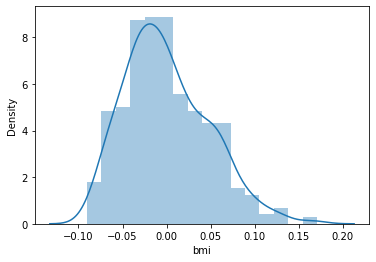

In [9]:
sns.distplot(my_dataframe['bmi'])

In [10]:
my_dataframe.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

### Handling Outliers

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


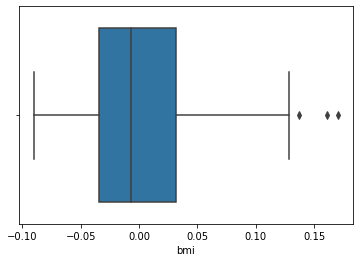

In [11]:
sns.boxplot(my_dataframe['bmi']);

In [13]:
my_dataframe.describe()['bmi']

count    4.420000e+02
mean    -8.045349e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64

In [17]:
q3 = my_dataframe.describe()['bmi'][6]
q1 = my_dataframe.describe()['bmi'][4]
print(q1, q3)

IQR = q3-q1
print(IQR)

max_value = q3 + 1.5*IQR
min_value = q1 - 1*IQR
print(min_value, max_value)

-0.0342290680567117 0.03124801543155308
0.06547708348826478
-0.09970615154497647 0.12946364066395025


Three outliers observed beyond 0.12

In [18]:
filter_ = my_dataframe['bmi'].values < 0.12

In [19]:
my_dataframe_filtered = my_dataframe[filter_]
my_dataframe_filtered

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

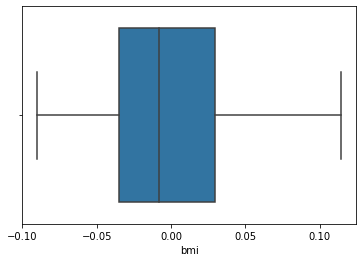

In [20]:
sns.boxplot(my_dataframe_filtered['bmi'])

<AxesSubplot:>

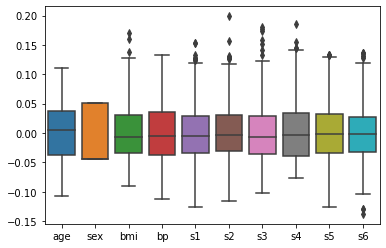

In [21]:
sns.boxplot(data = my_dataframe)

In [22]:
data = pd.DataFrame({'Name':['Jitendra','Michael','Manas','Gayatri','Jitendra','Jitendra','Michael','Manas',
                            'Sushil'],
                     'Subject':['Python','Data Science','Data Science','Python','Data Science','Python','Python','Python','Data Science'],
                     'Marks':[9,7,8,9,6,5,9,8,4]})

In [23]:
data

,Name,Subject,Marks
0,Jitendra,Python,9
1,Michael,Data Science,7
2,Manas,Data Science,8
3,Gayatri,Python,9
4,Jitendra,Data Science,6
5,Jitendra,Python,5
6,Michael,Python,9
7,Manas,Python,8
8,Sushil,Data Science,4


### group-by

In [24]:
data.groupby('Name').groups

{'Gayatri': [3], 'Jitendra': [0, 4, 5], 'Manas': [2, 7], 'Michael': [1, 6], 'Sushil': [8]}

In [25]:
data.groupby(['Name','Subject'])

In [26]:
data.groupby(['Name','Subject']).groups

{('Gayatri', 'Python'): [3], ('Jitendra', 'Data Science'): [4], ('Jitendra', 'Python'): [0, 5], ('Manas', 'Data Science'): [2], ('Manas', 'Python'): [7], ('Michael', 'Data Science'): [1], ('Michael', 'Python'): [6], ('Sushil', 'Data Science'): [8]}

#### Question : How many exams each student has given ?

In [27]:
#Count of occurence of each name
data.groupby(['Name']).count()#[['Subject']]

,Subject,Marks
Name,,
Gayatri,1,1
Jitendra,3,3
Manas,2,2
Michael,2,2
Sushil,1,1


### Question : How many exams each student has given per subject ?

In [28]:
data.groupby(['Name','Subject']).count()

Marks
Name     Subject            
Gayatri  Python            1
Jitendra Data Science      1
         Python            2
Manas    Data Science      1
         Python            1
Michael  Data Science      1
         Python            1
Sushil   Data Science      1

In [29]:
data

,Name,Subject,Marks
0,Jitendra,Python,9
1,Michael,Data Science,7
2,Manas,Data Science,8
3,Gayatri,Python,9
4,Jitendra,Data Science,6
5,Jitendra,Python,5
6,Michael,Python,9
7,Manas,Python,8
8,Sushil,Data Science,4


### Question : What is the total marks scored by each student ?

In [30]:
#Sum of each name
data.groupby('Name').sum()

,Marks
Name,
Gayatri,9
Jitendra,20
Manas,16
Michael,16
Sushil,4


### Question : What is the total marks scored by each student per subject ?

In [29]:
data.groupby(['Name','Subject']).sum()

Marks
Name     Subject            
Gayatri  Python            9
Jitendra Data Science      6
         Python           14
Manas    Data Science      8
         Python            8
Michael  Data Science      7
         Python            9
Sushil   Data Science      4

### Question : What is the total marks scored per subject per student ?

In [31]:
data.groupby(['Subject','Name']).sum()

Marks
Subject      Name           
Data Science Jitendra      6
             Manas         8
             Michael       7
             Sushil        4
Python       Gayatri       9
             Jitendra     14
             Manas         8
             Michael       9

In [32]:
#Mean of each name
data.groupby('Name').mean()

,Marks
Name,
Gayatri,9.000000
Jitendra,6.666667
Manas,8.000000
Michael,8.000000
Sushil,4.000000


In [33]:
#Max of each name
data.groupby('Name').max()

,Subject,Marks
Name,,
Gayatri,Python,9
Jitendra,Python,9
Manas,Python,8
Michael,Python,9
Sushil,Data Science,4


In [34]:
#Describe of each name
data.groupby('Name').describe()

Marks                                             
         count      mean       std  min  25%  50%  75%  max
Name                                                       
Gayatri    1.0  9.000000       NaN  9.0  9.0  9.0  9.0  9.0
Jitendra   3.0  6.666667  2.081666  5.0  5.5  6.0  7.5  9.0
Manas      2.0  8.000000  0.000000  8.0  8.0  8.0  8.0  8.0
Michael    2.0  8.000000  1.414214  7.0  7.5  8.0  8.5  9.0
Sushil     1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0

In [35]:
data

,Name,Subject,Marks
0,Jitendra,Python,9
1,Michael,Data Science,7
2,Manas,Data Science,8
3,Gayatri,Python,9
4,Jitendra,Data Science,6
5,Jitendra,Python,5
6,Michael,Python,9
7,Manas,Python,8
8,Sushil,Data Science,4


In [36]:
data_new = pd.DataFrame({'Name':['Ashutosh','Sunil','Ashutosh'],
                        'Subject':['Python','Python','Python'],
                        'Marks':[9,8,8]})
data_new

,Name,Subject,Marks
0,Ashutosh,Python,9
1,Sunil,Python,8
2,Ashutosh,Python,8


In [16]:
#Concatenate one below the other
# pd.concat([data,data_new])
pd.concat([data,data_new],ignore_index=True)

,Name,Subject,Marks
0,Jitendra,Python,9
1,Michael,Data Science,7
2,Manas,Data Science,8
3,Gayatri,Python,9
4,Jitendra,Data Science,6
5,Jitendra,Python,5
6,Michael,Python,9
7,Manas,Python,8
8,Sushil,Data Science,4
9,Ashutosh,Python,9


In [37]:
#Concatenate along x axis (horizontally)
pd.concat([data,data_new], axis = 1)

,Name,Subject,Marks,Name,Subject,Marks
0,Jitendra,Python,9,Ashutosh,Python,9.0
1,Michael,Data Science,7,Sunil,Python,8.0
2,Manas,Data Science,8,Ashutosh,Python,8.0
3,Gayatri,Python,9,NaN,NaN,NaN
4,Jitendra,Data Science,6,NaN,NaN,NaN
5,Jitendra,Python,5,NaN,NaN,NaN
6,Michael,Python,9,NaN,NaN,NaN
7,Manas,Python,8,NaN,NaN,NaN
8,Sushil,Data Science,4,NaN,NaN,NaN


In [37]:
data

,Name,Subject,Marks
0,Jitendra,Python,9
1,Michael,Data Science,7
2,Manas,Data Science,8
3,Gayatri,Python,9
4,Jitendra,Data Science,6
5,Jitendra,Python,5
6,Michael,Python,9
7,Manas,Python,8
8,Sushil,Data Science,4


In [38]:
data_new_2 = pd.DataFrame({'Names':['Ashutosh','Sunil','Ashutosh'],
                        'Subject':['Python','Python','Python'],
                        'Grade':['A','A','B']})
data_new_2

,Names,Subject,Grade
0,Ashutosh,Python,A
1,Sunil,Python,A
2,Ashutosh,Python,B


In [20]:
pd.concat([data,data_new_2])

,Name,Subject,Marks,Names,Grade
0,Jitendra,Python,9.0,NaN,NaN
1,Michael,Data Science,7.0,NaN,NaN
2,Manas,Data Science,8.0,NaN,NaN
3,Gayatri,Python,9.0,NaN,NaN
4,Jitendra,Data Science,6.0,NaN,NaN
5,Jitendra,Python,5.0,NaN,NaN
6,Michael,Python,9.0,NaN,NaN
7,Manas,Python,8.0,NaN,NaN
8,Sushil,Data Science,4.0,NaN,NaN
0,NaN,Python,NaN,Ashutosh,A


### Pivot Tables

In [39]:
data

,Name,Subject,Marks
0,Jitendra,Python,9
1,Michael,Data Science,7
2,Manas,Data Science,8
3,Gayatri,Python,9
4,Jitendra,Data Science,6
5,Jitendra,Python,5
6,Michael,Python,9
7,Manas,Python,8
8,Sushil,Data Science,4


In [40]:
pd.pivot_table(data, index = ['Name'], columns = ['Subject'], values = 'Marks', fill_value = -1, aggfunc=np.mean)

Subject,Data Science,Python
Name,,
Gayatri,-1,9
Jitendra,6,7
Manas,8,8
Michael,7,9
Sushil,4,-1


### Merge/Join

Scenario 1 - not preserving any table 

Whatever is common keep that ( Inner JOIN )

In [41]:
data = pd.DataFrame({'Name':['Sudhir','Hariprasad','Mahesh','Dhanashree','Sudhir','Sudhir','Hariprasad','Mahesh',
                            'Sushil'],
                     'Subject':['Python','Data Science','Data Science','Python','Data Science','Python','Python','Python','Data Science'],
                     'Marks':[9,7,8,9,6,5,9,8,4]})
data

,Name,Subject,Marks
0,Sudhir,Python,9
1,Hariprasad,Data Science,7
2,Mahesh,Data Science,8
3,Dhanashree,Python,9
4,Sudhir,Data Science,6
5,Sudhir,Python,5
6,Hariprasad,Python,9
7,Mahesh,Python,8
8,Sushil,Data Science,4


In [42]:
data_new_3 = pd.DataFrame({'Name':['Sudhir','Hariprasad','Mahesh','Dhanashree',
                            'Sushil'],
                          'Gender':['Male',' Male', 'Male', 'Female', 'Male']})
data_new_3

,Name,Gender
0,Sudhir,Male
1,Hariprasad,Male
2,Mahesh,Male
3,Dhanashree,Female
4,Sushil,Male


In [27]:
set(data.Name.unique()).intersection(data_new_3.Name.unique())

{'Dhanashree', 'Hariprasad', 'Mahesh', 'Sudhir', 'Sushil'}

In [43]:
pd.merge(data,data_new_3,on='Name')

,Name,Subject,Marks,Gender
0,Sudhir,Python,9,Male
1,Sudhir,Data Science,6,Male
2,Sudhir,Python,5,Male
3,Hariprasad,Data Science,7,Male
4,Hariprasad,Python,9,Male
5,Mahesh,Data Science,8,Male
6,Mahesh,Python,8,Male
7,Dhanashree,Python,9,Female
8,Sushil,Data Science,4,Male


In [24]:
pd.concat([data, data_new_3], axis = 1)

,Name,Subject,Marks,Name,Gender
0,Sudhir,Python,9,Sudhir,Male
1,Hariprasad,Data Science,7,Hariprasad,Male
2,Mahesh,Data Science,8,Mahesh,Male
3,Dhanashree,Python,9,Dhanashree,Female
4,Sudhir,Data Science,6,Sushil,Male
5,Sudhir,Python,5,NaN,NaN
6,Hariprasad,Python,9,NaN,NaN
7,Mahesh,Python,8,NaN,NaN
8,Sushil,Data Science,4,NaN,NaN


Scenario 2 - preserve the content of left table always
    Left JOIN

In [44]:
#Removed Sudhir deliberately
data_new_4 = pd.DataFrame({'Name':['Hariprasad','Mahesh','Dhanashree',
                            'Sushil'],
                          'Groups':['Male', 'Male', 'Female', 'Male']})
data_new_4

,Name,Groups
0,Hariprasad,Male
1,Mahesh,Male
2,Dhanashree,Female
3,Sushil,Male


In [45]:
data

,Name,Subject,Marks
0,Sudhir,Python,9
1,Hariprasad,Data Science,7
2,Mahesh,Data Science,8
3,Dhanashree,Python,9
4,Sudhir,Data Science,6
5,Sudhir,Python,5
6,Hariprasad,Python,9
7,Mahesh,Python,8
8,Sushil,Data Science,4


In [46]:
set(data.Name.unique()).intersection(data_new_4.Name.unique())

{'Dhanashree', 'Hariprasad', 'Mahesh', 'Sushil'}

In [47]:
#No more occurences of Sudhir 
pd.merge(data,data_new_4,on='Name')

,Name,Subject,Marks,Groups
0,Hariprasad,Data Science,7,Male
1,Hariprasad,Python,9,Male
2,Mahesh,Data Science,8,Male
3,Mahesh,Python,8,Male
4,Dhanashree,Python,9,Female
5,Sushil,Data Science,4,Male


In [48]:
data

,Name,Subject,Marks
0,Sudhir,Python,9
1,Hariprasad,Data Science,7
2,Mahesh,Data Science,8
3,Dhanashree,Python,9
4,Sudhir,Data Science,6
5,Sudhir,Python,5
6,Hariprasad,Python,9
7,Mahesh,Python,8
8,Sushil,Data Science,4


In [49]:
#if i want to preserve one of my tables(left table)

pd.merge(data,data_new_4,on='Name', how='left')

,Name,Subject,Marks,Groups
0,Sudhir,Python,9,NaN
1,Hariprasad,Data Science,7,Male
2,Mahesh,Data Science,8,Male
3,Dhanashree,Python,9,Female
4,Sudhir,Data Science,6,NaN
5,Sudhir,Python,5,NaN
6,Hariprasad,Python,9,Male
7,Mahesh,Python,8,Male
8,Sushil,Data Science,4,Male


Scenario 3

Preserve content of right table 

Right JOIN

In [50]:
# data = pd.DataFrame({'Name':['Jitendra','Michael','Manas','Gayatri','Jitendra','Jitendra','Michael','Manas'],
#                      'Subject':['Python','Data Science','Data Science','Python','Data Science','Python','Python','Python'],
#                      'Marks':[9,7,8,9,6,5,9,8]})
data

,Name,Subject,Marks
0,Sudhir,Python,9
1,Hariprasad,Data Science,7
2,Mahesh,Data Science,8
3,Dhanashree,Python,9
4,Sudhir,Data Science,6
5,Sudhir,Python,5
6,Hariprasad,Python,9
7,Mahesh,Python,8
8,Sushil,Data Science,4


In [51]:
#Added Rahil
data_new_4 = pd.DataFrame({'Name':['Hariprasad','Mahesh','Dhanashree',
                            'Sushil', 'Rahil'],
                          'Groups':['Male', 'Male', 'Female', 'Male', 'Male']})
data_new_4

,Name,Groups
0,Hariprasad,Male
1,Mahesh,Male
2,Dhanashree,Female
3,Sushil,Male
4,Rahil,Male


In [52]:
pd.merge(data,data_new_4,on='Name',how='right')

,Name,Subject,Marks,Groups
0,Hariprasad,Data Science,7.0,Male
1,Hariprasad,Python,9.0,Male
2,Mahesh,Data Science,8.0,Male
3,Mahesh,Python,8.0,Male
4,Dhanashree,Python,9.0,Female
5,Sushil,Data Science,4.0,Male
6,Rahil,NaN,NaN,Male


Scenario 4 - Preserve content of both tables

  Outer JOIN

In [32]:
data = pd.DataFrame({'Name':['Sudhir','Hariprasad','Mahesh','Dhanashree','Sudhir','Sudhir','Hariprasad','Mahesh',
                            'Sushil', 'Vishal'],
                     'Subject':['Python','Data Science','Data Science','Python','Data Science','Python','Python','Python','Data Science','AI'],
                     'Marks':[9,7,8,9,6,5,9,8,4,9]})
data

,Name,Subject,Marks
0,Sudhir,Python,9
1,Hariprasad,Data Science,7
2,Mahesh,Data Science,8
3,Dhanashree,Python,9
4,Sudhir,Data Science,6
5,Sudhir,Python,5
6,Hariprasad,Python,9
7,Mahesh,Python,8
8,Sushil,Data Science,4
9,Vishal,AI,9


In [33]:
#Added Rahil
data_new_4 = pd.DataFrame({'Name':['Hariprasad','Mahesh','Dhanashree',
                            'Sushil', 'Rahil'],
                          'Groups':['Male', 'Male', 'Female', 'Male', 'Male']})
data_new_4

,Name,Groups
0,Hariprasad,Male
1,Mahesh,Male
2,Dhanashree,Female
3,Sushil,Male
4,Rahil,Male


In [35]:
pd.merge(data,data_new_4,on='Name',how='outer')

,Name,Subject,Marks,Groups
0,Sudhir,Python,9.0,NaN
1,Sudhir,Data Science,6.0,NaN
2,Sudhir,Python,5.0,NaN
3,Hariprasad,Data Science,7.0,Male
4,Hariprasad,Python,9.0,Male
5,Mahesh,Data Science,8.0,Male
6,Mahesh,Python,8.0,Male
7,Dhanashree,Python,9.0,Female
8,Sushil,Data Science,4.0,Male
9,Vishal,AI,9.0,NaN


In [45]:
pd.concat([data,data_new_4], axis = 1)

,Name,Subject,Marks,Name,Groups
0,Sudhir,Python,9,Hariprasad,Male
1,Hariprasad,Data Science,7,Mahesh,Male
2,Mahesh,Data Science,8,Dhanashree,Female
3,Dhanashree,Python,9,Sushil,Male
4,Sudhir,Data Science,6,Rahil,Male
5,Sudhir,Python,5,NaN,NaN
6,Hariprasad,Python,9,NaN,NaN
7,Mahesh,Python,8,NaN,NaN
8,Sushil,Data Science,4,NaN,NaN
9,Vishal,AI,9,NaN,NaN


In [33]:
data_new_4

,Name,Groups
0,Hariprasad,2
1,Mahesh,3
2,Dhanashree,1
3,Sushil,4
4,Rahil,5


count    4.420000e+02
mean    -8.045349e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64

0.06547708348826478


-0.13244469328910888 0.12946364066395025
